In [9]:
import sys
sys.path.insert(0, '/Users/jisunan/myRepository/code-word2vec-application/analysis/05-alltogether/')
from groupcomparison_py3 import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
def find_similar_words(myembed, seedword, k=10):
    myvec = myembed[seedword]
    wordlist = [seedword]
    myresult = myembed.closest(seedword, n=2)
    word_next = myresult[1][1]
    yourvec = myembed[word_next]
    wordlist.append(word_next)
    avg_vec = (myvec+yourvec)*0.5

    for i in range(0,k-1):
        myresult = myembed.closest_byvec(avg_vec, n=20)
        myvec = avg_vec
        for score, word in myresult:
            if word not in wordlist:
                yourvec = myembed[word]
                wordlist.append(word)
                avg_vec = (myvec+yourvec)*0.5
                break
    return wordlist

In [11]:
def pca_plot(name_A, name_B, embed_A, embed_B, set_A, set_B):
    
    myvecs = []
    for each_word in sorted(set_A):
        myvecs.append(embed_A[each_word])
    pca = PCA(n_components=2)
    X_pca_A = pca.fit(myvecs).transform(myvecs)

    myvecs = []
    for each_word in sorted(set_B):
        myvecs.append(embed_B[each_word])
    pca_B = PCA(n_components=2)
    X_pca_B = pca_B.fit(myvecs).transform(myvecs)

    print('Hillary Clinton:', set_A)
    print('Donald Trump:', set_B)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle("%s" % (seedword.title()))
    ax1.scatter(X_pca_A[:, 0], X_pca_A[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_A)):
        ax1.annotate(txt, (X_pca_A[i, 0], X_pca_A[i, 1]))
        ax1.set_title(name_A)
    ax2.scatter(X_pca_B[:, 0], X_pca_B[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_B)):
        ax2.annotate(txt, (X_pca_B[i, 0], X_pca_B[i, 1]))
        ax2.set_title(name_B)
    # plt.title('PCA of dataset')
    plt.show()

In [12]:
name_base = "hillaryclinton"
name_other = "TheDonald"
base_path = "../05-alltogether/w2v_model/trained.%s.model.txt" % (name_base)
aligned_path = "../05-alltogether/w2v_model/aligned.%s_basedon_%s.model.txt" % (name_other, name_base)
isSgns = False
embed_A, embed_B = getEmbeds(base_path, aligned_path, isSgns)

In [13]:
seedwords = ['immigration', 'terror', 'energy', 'racial', 'economy', 'technology']

## 20 nearest words

---------------------------------------------------
immigration
Hillary Clinton: ['immigration', 'immigrants', 'amnesty', 'protectionist', 'deportation', 'immigrant', 'undocumented', 'protectionism', 'deporting', 'implementing', 'enacting', 'nafta', 'homosexuality', 'implementation', 'illegals', 'environmental', 'discriminatory', 'detention', 'banning', 'muslims']
Donald Trump: ['immigration', 'migration', 'immigrants', 'immigrations', 'imigration', 'immigrantion', 'importation', 'emigration', 'imigrants', 'immgrants', 'immigrant', 'inmigration', 'crossings', 'deportations', 'migrations', 'immegrants', 'immagrants', 'borders', 'integration', 'migrants']


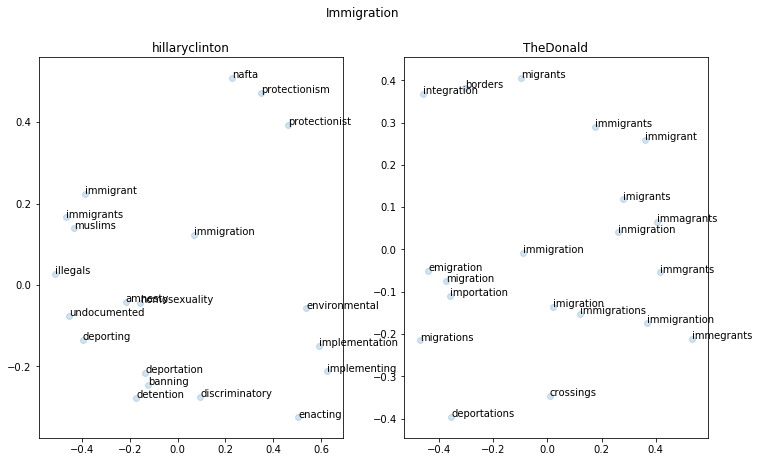

---------------------------------------------------
terror
Hillary Clinton: ['terror', 'terrorist', 'terrorism', 'terrorists', 'civilians', 'islamist', 'isil', 'atrocities', 'torture', 'militants', 'syrian', 'sunni', 'iranian', 'killings', 'mosul', 'bombing', 'gaddafi', 'rebels', 'perpetrators', 'bombings']
Donald Trump: ['terror', 'terrorist', 'terrorism', 'terrorists', 'militants', 'jihadist', 'jihadists', 'terroristic', 'terroist', 'jihadism', 'extremism', 'jihadi', 'isis', 'largescale', 'massacres', 'jihad', 'terroism', 'extremists', 'jihadis', 'islamist']


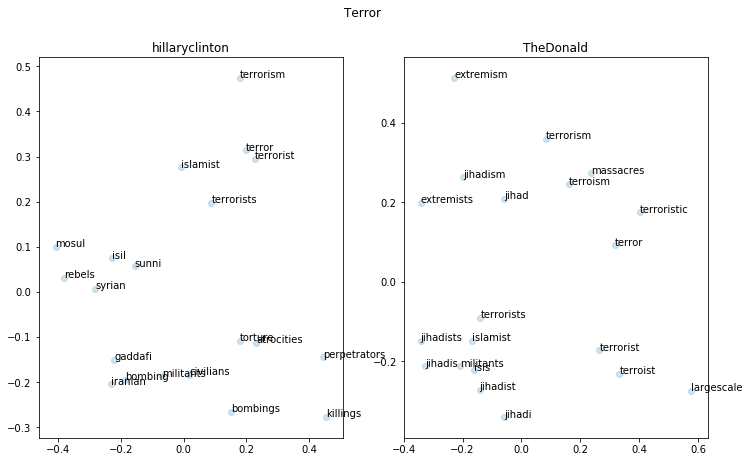

---------------------------------------------------
energy
Hillary Clinton: ['energy', 'energies', 'renewables', 'renewable', 'solar', 'cleaner', 'resources', 'sustainable', 'coal', 'plants', 'infrastructure', 'fracking', 'efficient', 'fuels', 'technology', 'emissions', 'geothermal', 'squeaky', 'stoves', 'cookstoves']
Donald Trump: ['energy', 'enegry', 'energies', 'enery', 'engergy', 'engery', 'energey', 'evergy', 'enegy', 'octane', 'fiving', 'voltage', 'ener', 'fived', 'energyyyyy', 'enrgy', 'energy༼', 'unfavorables', 'fives', 'amperage']


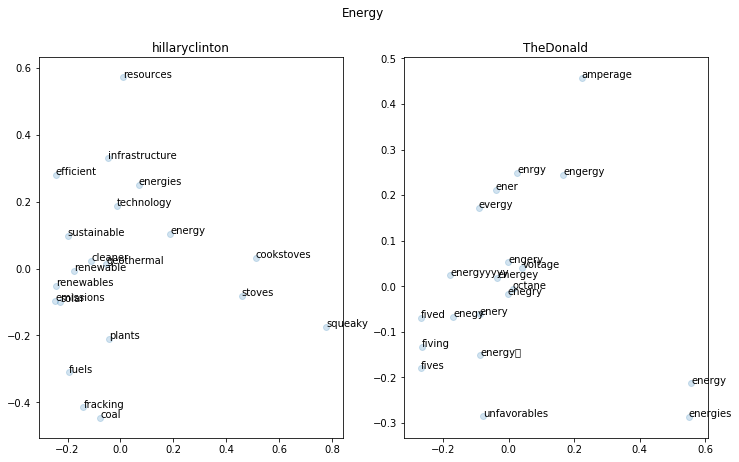

---------------------------------------------------
racial
Hillary Clinton: ['racial', 'systemic', 'prejudice', 'ethnic', 'classism', 'systematic', 'cultural', 'oppression', 'homophobia', 'disparities', 'racism', 'socioeconomic', 'profiling', 'institutional', 'institutionalized', 'ethnicity', 'egalitarian', 'discrimination', 'societal', 'gender']
Donald Trump: ['racial', 'ethnic', 'racially', 'racism', 'disharmony', 'race', 'separatism', 'epithets', 'whites', 'divides', 'stereotyping', 'segregation', 'disparities', 'interbreeding', 'systemic', 'prejudice', 'divisiveness', 'generational', 'ethnicity', 'discrimination']


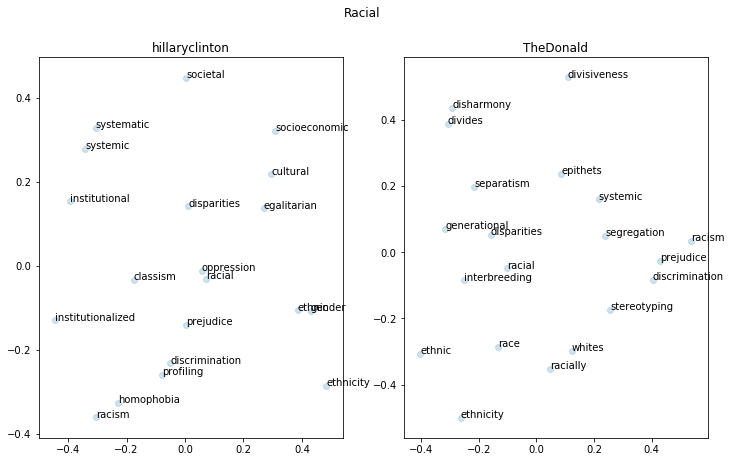

---------------------------------------------------
economy
Hillary Clinton: ['economy', 'economies', 'recession', 'economic', 'tariffs', 'sectors', 'globalization', 'growth', 'automation', 'gdp', 'nafta', 'stability', 'manufacturing', 'domestically', 'surplus', 'businesses', 'wages', 'sector', 'deficits', 'livelihoods']
Donald Trump: ['economy', 'economies', 'economic', 'economically', 'infrastructure', 'markets', 'exports', 'gdp', 'competitiveness', 'market', 'industries', 'sectors', 'manufacturing', 'recession', 'trade', 'industry', 'productivity', 'innovation', 'growth', 'workforce']


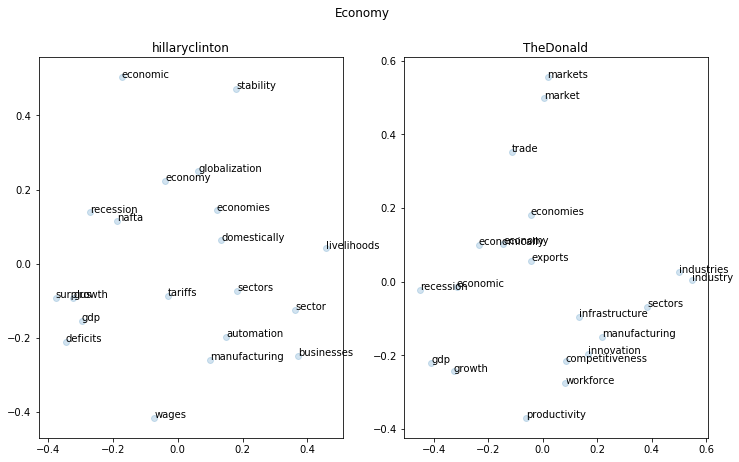

---------------------------------------------------
technology
Hillary Clinton: ['technology', 'technologies', 'innovation', 'techniques', 'reactors', 'automation', 'technological', 'equipment', 'hardware', 'engineers', 'efficient', 'software', 'tech', 'innovations', 'development', 'renewables', 'mechanisms', 'storage', 'encryption', 'broadband']
Donald Trump: ['technology', 'technologies', 'technological', 'innovations', 'advancements', 'tech', 'robotics', 'innovation', 'breakthroughs', 'capabilities', 'reactors', 'hardware', 'electronics', 'weaponry', 'advanced', 'renewables', 'processors', 'invention', 'advancement', 'technologically']


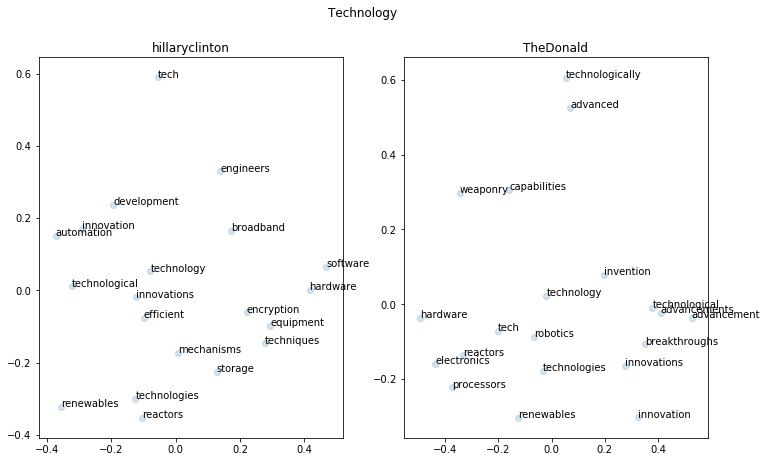

In [14]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)
    set_A = [term[1] for term in embed_A.closest(seedword, 20)]
    set_B = [term[1] for term in embed_B.closest(seedword, 20)]
    pca_plot(name_base, name_other, embed_A, embed_B, set_A, set_B)

## 20 "similar words" by average vector method

---------------------------------------------------
immigration
Hillary Clinton: ['immigration', 'immigrants', 'undocumented', 'deporting', 'illegals', 'mexicans', 'rapists', 'murderers', 'criminals', 'dealers', 'cartels', 'dealer', 'manufactures', 'explosives', 'handgun', 'firearm', 'firearms', 'handguns', 'rifles', 'rifle', 'shotguns']
Donald Trump: ['immigration', 'migration', 'emigration', 'importation', 'migrations', 'influx', 'influxes', 'inflow', 'swathes', 'swaths', 'swathe', 'swath', 'tracts', 'hadron', 'collider', 'quantities', 'portions', 'portion', 'chunk', 'chunks', 'amounts']


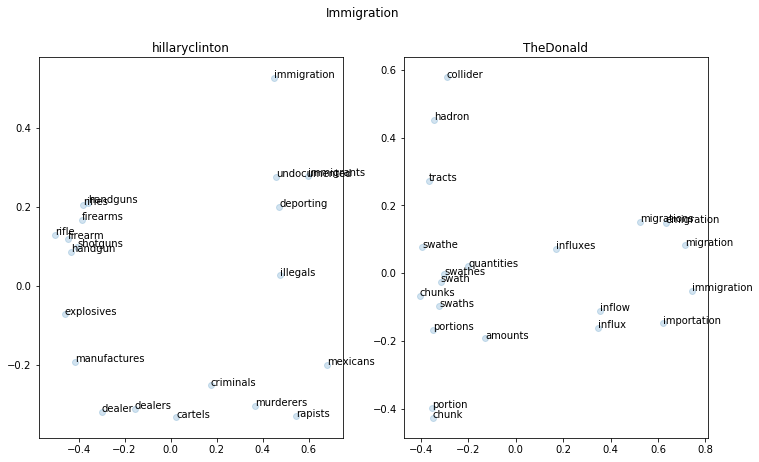

---------------------------------------------------
terror
Hillary Clinton: ['terror', 'terrorist', 'terrorists', 'civilians', 'innocents', 'soldiers', 'iraqi', 'iranian', 'libyan', 'kurds', 'kurdish', 'rebels', 'assad', 'isil', 'gaddafi', 'qaddafi', 'saddam', 'hussein', 'kuwait', 'afghanistan', 'kosovo']
Donald Trump: ['terror', 'terrorist', 'terrorism', 'terrorists', 'jihadists', 'jihadis', 'militants', 'jihadist', 'islamist', 'islamists', 'islamics', 'muslims', 'islam', 'islams', 'islamism', 'jihadism', 'extremism', 'radicalism', 'fundamentalism', 'fundamentalists', 'fundamentalist']


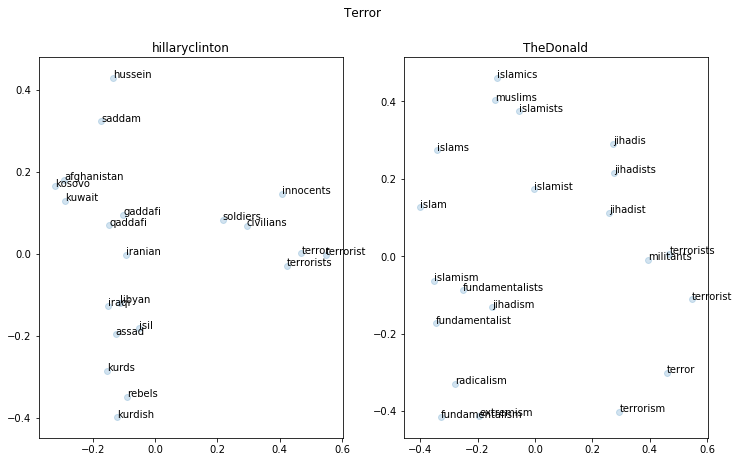

---------------------------------------------------
energy
Hillary Clinton: ['energy', 'energies', 'renewables', 'renewable', 'cleaner', 'sustainable', 'efficient', 'efficiency', 'emissions', 'co2', 'greenhouse', 'pollution', 'emission', 'pricing', 'liquidity', 'securities', 'derivatives', 'lenders', 'mortgage', 'mortgages', 'homeowners']
Donald Trump: ['energy', 'enegry', 'enery', 'engery', 'evergy', 'energey', 'fived', 'fiving', 'enegy', 'energy༽つ', 'energyyyyy', 'kite', 'fives', 'cheekbones', 'cheekbone', 'ener', 'octane', 'voltage', 'velocities', 'fructose', 'carb']


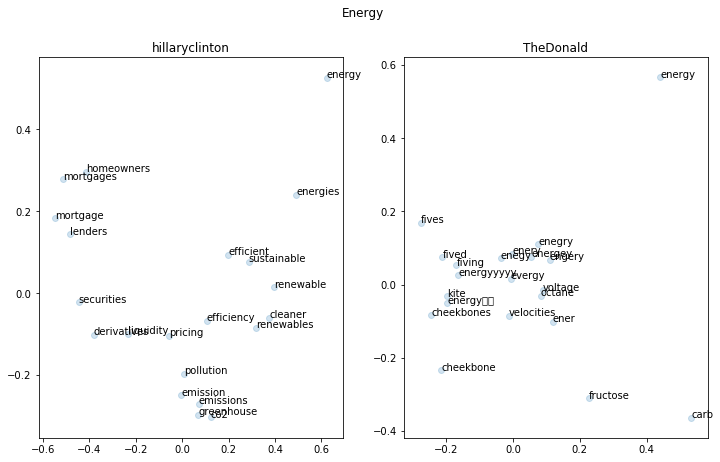

---------------------------------------------------
racial
Hillary Clinton: ['racial', 'systemic', 'systematic', 'institutional', 'institutionalized', 'homophobia', 'xenophobia', 'bigotry', 'racism', 'misogyny', 'sexism', 'internalized', 'latent', 'overt', 'prejudice', 'subconscious', 'unconscious', 'implicit', 'inherent', 'societal', 'structural']
Donald Trump: ['racial', 'ethnic', 'ethnicity', 'nationality', 'caucasian', 'mestizo', 'amerindian', 'mestizos', 'amerindians', 'spaniards', 'anglos', 'slavs', 'italians', 'romanians', 'hungarians', 'czechs', 'slovaks', 'bulgarians', 'tatars', 'chechens', 'bosnians']


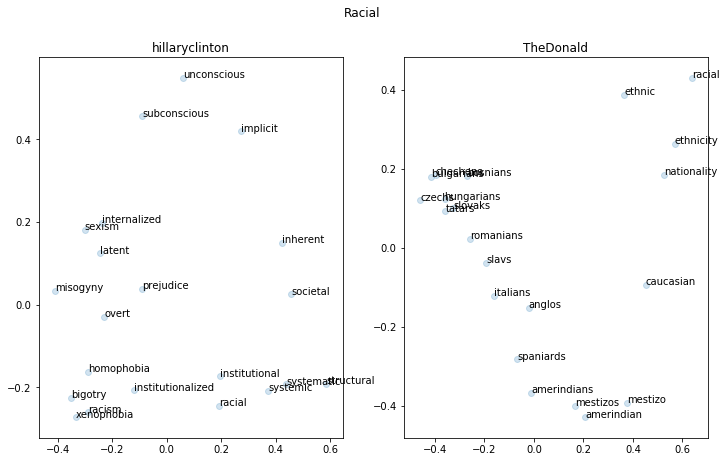

---------------------------------------------------
economy
Hillary Clinton: ['economy', 'economies', 'tariffs', 'exports', 'imports', 'tariff', 'goods', 'export', 'import', 'bonds', 'consumers', 'products', 'investors', 'assets', 'investments', 'investment', 'transactions', 'securities', 'lenders', 'mortgage', 'mortgages']
Donald Trump: ['economy', 'economies', 'markets', 'market', 'marketplace', 'pricing', 'consumers', 'consumer', 'products', 'product', 'goods', 'suppliers', 'retailers', 'vendors', 'vendor', 'retailer', 'stores', 'store', 'shops', 'shop', 'restaurants']


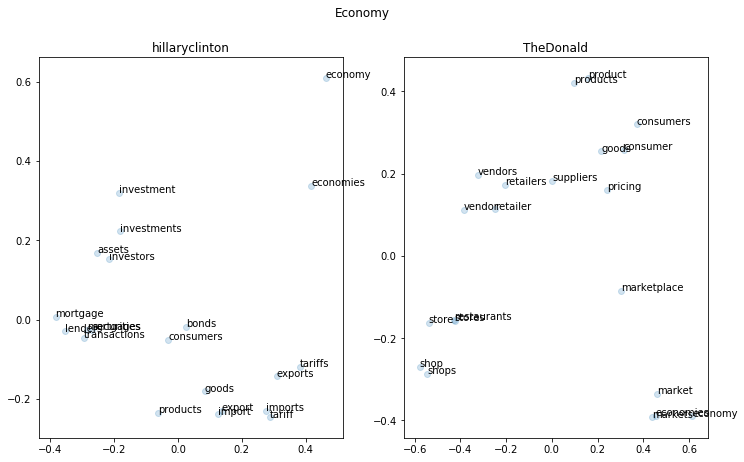

---------------------------------------------------
technology
Hillary Clinton: ['technology', 'technologies', 'reactors', 'reactor', 'plants', 'renewables', 'renewable', 'geothermal', 'grid', 'extraction', 'shale', 'greenhouse', 'emissions', 'co2', 'pollution', 'emission', 'methane', 'gases', 'dioxide', 'footprint', 'output']
Donald Trump: ['technology', 'technologies', 'innovations', 'advancements', 'breakthroughs', 'discoveries', 'inventions', 'advances', 'advancement', 'technological', 'innovation', 'competitiveness', 'sustainability', 'sustainable', 'renewables', 'renewable', 'thorium', 'reactors', 'reactor', 'fission', 'fusion']


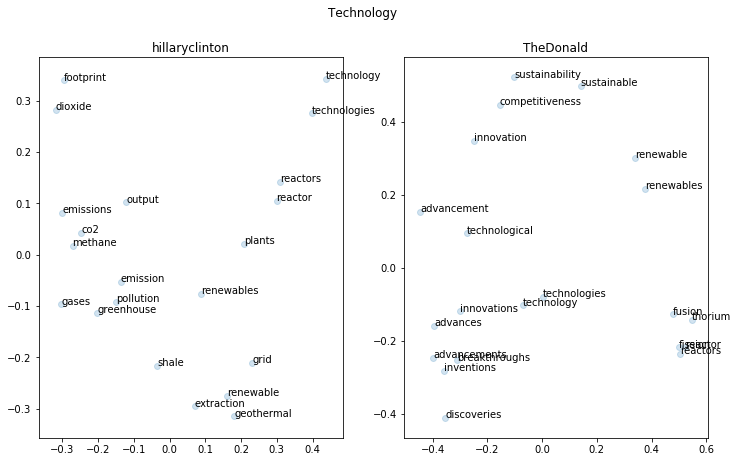

In [15]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)
    set_A = (find_similar_words(embed_A, seedword, 20))
    set_B = (find_similar_words(embed_B, seedword, 20))
    pca_plot(name_base, name_other, embed_A, embed_B, set_A, set_B)

## 10 nearest words of 5 similar words by average vector method

---------------------------------------------------
immigration
Hillary Clinton: dict_keys(['immigration', 'immigrants', 'amnesty', 'protectionist', 'deportation', 'immigrant', 'undocumented', 'protectionism', 'deporting', 'implementing', 'illegals', 'refugees', 'muslims', 'mexicans', 'migrants', 'deported', 'visas', 'h1b', 'deport', 'deportations', 'rapists', 'murderers', 'criminals', 'arabs', 'blacks', 'mexican'])
Donald Trump: dict_keys(['immigration', 'migration', 'immigrants', 'immigrations', 'imigration', 'immigrantion', 'importation', 'emigration', 'imigrants', 'immgrants', 'migrations', 'migrant', 'migrants', 'influx', 'integration', 'deportations', 'displacement', 'incarceration', 'europe', 'importing', 'import', 'inflow', 'imported', 'exodus', 'influxes', 'emmigration', 'flooding', 'surge', 'flood', 'uptick'])


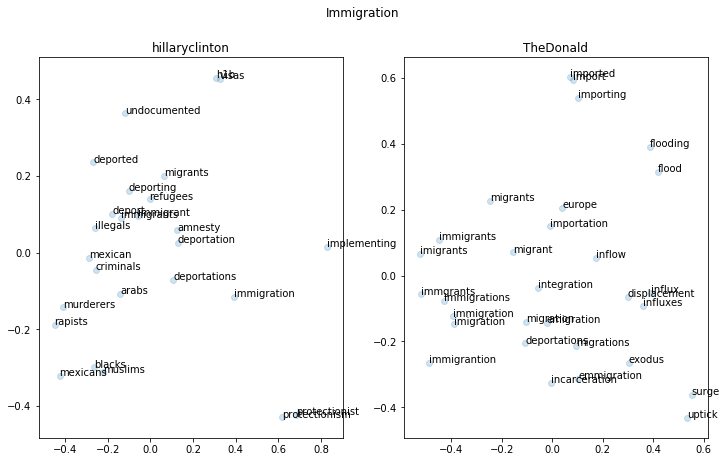

---------------------------------------------------
terror
Hillary Clinton: dict_keys(['terror', 'terrorist', 'terrorism', 'terrorists', 'civilians', 'islamist', 'isil', 'atrocities', 'torture', 'militants', 'bombings', 'brussels', 'perpetrators', 'bombing', 'criminals', 'syrian', 'soldiers', 'isis', 'sunni', 'innocents', 'civilian', 'iranian', 'gaddafi', 'iraqis', 'iraqi', 'killings', 'untold', 'accidental', 'indiscriminately', 'indiscriminate', 'casualties', 'servicemen', 'troops', 'sailors'])
Donald Trump: dict_keys(['terror', 'terrorist', 'terrorism', 'terrorists', 'militants', 'jihadist', 'jihadists', 'terroristic', 'terroist', 'jihadism', 'jihadi', 'islamist', 'extremism', 'terroism', 'radicalization', 'violence', 'isis', 'jihadis', 'extremists', 'islamists', 'insurgents', 'iraqis', 'syrians'])


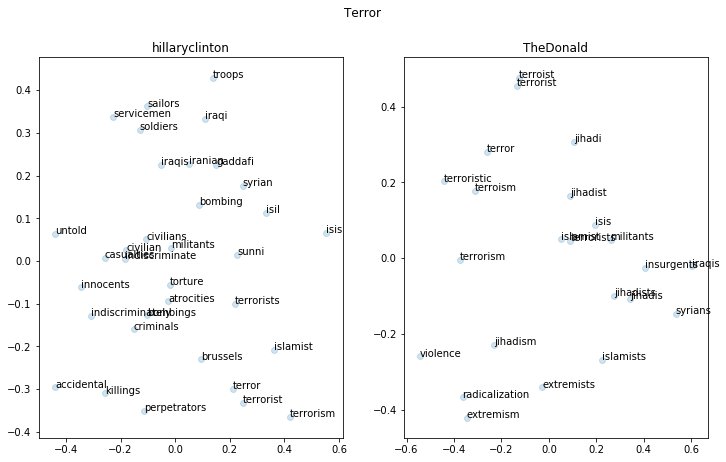

---------------------------------------------------
energy
Hillary Clinton: dict_keys(['energy', 'energies', 'renewables', 'renewable', 'solar', 'cleaner', 'resources', 'sustainable', 'coal', 'plants', 'efficiency', 'technologies', 'emissions', 'geothermal', 'greenhouse', 'co2', 'grid', 'extraction', 'fuels', 'efficient', 'innovation', 'incentives', 'subsidizing'])
Donald Trump: dict_keys(['energy', 'enegry', 'energies', 'enery', 'engergy', 'engery', 'energey', 'evergy', 'enegy', 'octane', 'fiving', 'fived', 'ener', 'kite', 'energyyyyy', 'voltage', 'energy༽つ'])


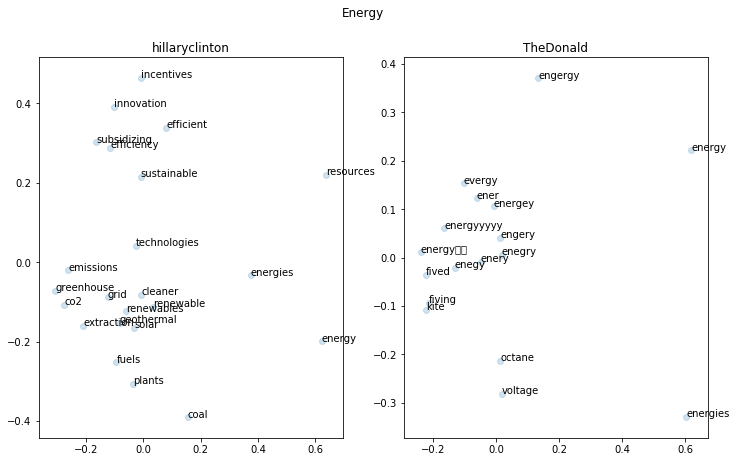

---------------------------------------------------
racial
Hillary Clinton: dict_keys(['racial', 'systemic', 'prejudice', 'ethnic', 'classism', 'systematic', 'cultural', 'oppression', 'homophobia', 'disparities', 'institutional', 'inherent', 'structural', 'underlying', 'institutionalized', 'societal', 'widespread', 'overt', 'rooted', 'xenophobia', 'misogyny', 'internalized', 'racism', 'islamophobia', 'bigotry'])
Donald Trump: dict_keys(['racial', 'ethnic', 'racially', 'racism', 'disharmony', 'race', 'separatism', 'epithets', 'whites', 'divides', 'ethnically', 'ethnicity', 'ethnoreligious', 'ethnicities', 'ethnical', 'germanic', 'homogeneity', 'interbreeding', 'nationality', 'caucasian', 'ancestry', 'heritage', 'creed', 'color', 'origin', 'mestizo', 'nationalities', 'descent', 'caucasoid', 'caucasians', 'asian', 'hispanic', 'negroid', 'slavic', 'nonwhite', 'amerindian', 'mestizos', 'amerindians', 'spaniard', 'spaniards'])


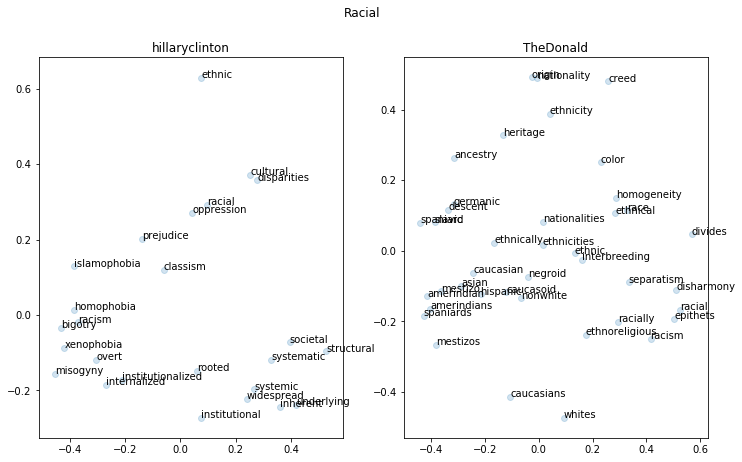

---------------------------------------------------
economy
Hillary Clinton: dict_keys(['economy', 'economies', 'recession', 'economic', 'tariffs', 'sectors', 'globalization', 'growth', 'automation', 'gdp', 'exports', 'currency', 'countries', 'developing', 'governments', 'regions', 'tariff', 'imports', 'goods', 'export', 'emissions', 'agreements', 'prices', 'pollution', 'agricultural', 'import', 'importing', 'dependence', 'imported', 'derivatives', 'subsidy'])
Donald Trump: dict_keys(['economy', 'economies', 'economic', 'economically', 'infrastructure', 'markets', 'exports', 'gdp', 'competitiveness', 'market', 'industries', 'countries', 'currencies', 'governments', 'stocks', 'traders', 'derivatives', 'marketplace', 'prices', 'pricing', 'consumers', 'competition', 'insurers', 'consumer', 'product', 'providers', 'availability', 'pharmaceuticals', 'subsidy', 'generics', 'suppliers', 'unregulated'])


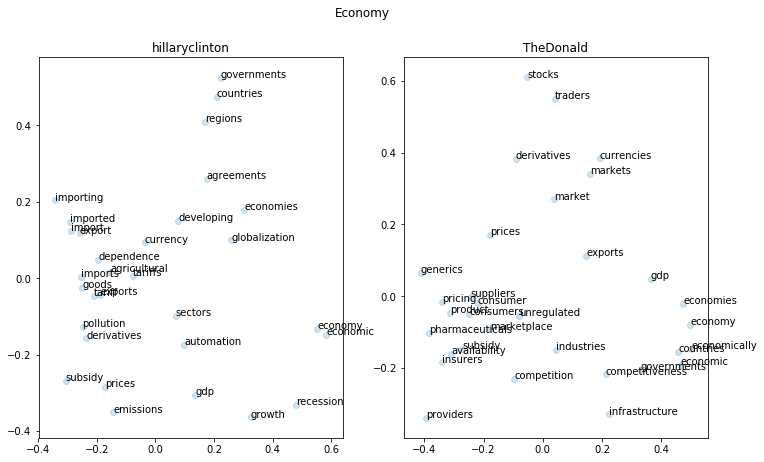

---------------------------------------------------
technology
Hillary Clinton: dict_keys(['technology', 'technologies', 'innovation', 'techniques', 'reactors', 'automation', 'technological', 'equipment', 'hardware', 'engineers', 'reactor', 'renewables', 'plants', 'missions', 'nrc', 'thorium', 'grid', 'fission', 'storage', 'batteries', 'missiles', 'arsenal', 'solar', 'renewable', 'emissions', 'greenhouse', 'cleaner', 'co2', 'geothermal'])
Donald Trump: dict_keys(['technology', 'technologies', 'technological', 'innovations', 'advancements', 'tech', 'robotics', 'innovation', 'breakthroughs', 'capabilities', 'industries', 'renewables', 'reactors', 'innovating', 'designs', 'inventions', 'discoveries', 'advancement', 'advances', 'improvements', 'breakthrough', 'developments', 'discovery', 'phenomena'])


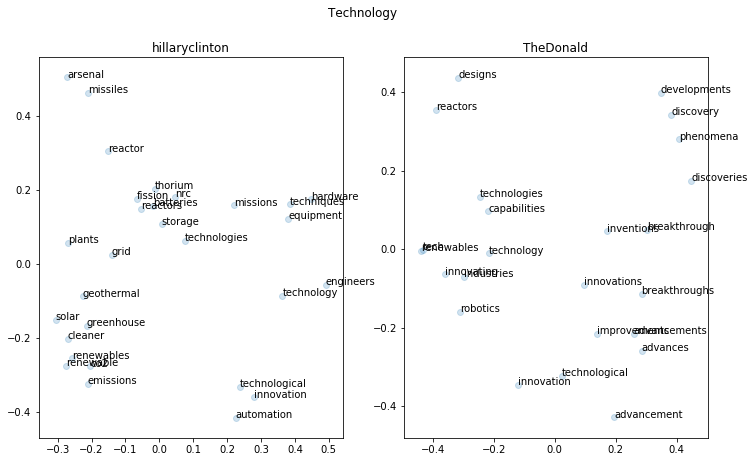

In [16]:
for seedword in seedwords:
    print("---------------------------------------------------")
    print(seedword)

    similar_words_A = (find_similar_words(embed_A, seedword, 5))
    set_A = {}
    for each_word in similar_words_A:
        for term in embed_A.closest(each_word, 10):
            set_A[term[1]] = 1

    similar_words_B = (find_similar_words(embed_B, seedword, 5))
    set_B = {}
    for each_word in similar_words_B:
        for term in embed_B.closest(each_word, 10):
            set_B[term[1]] = 1

    pca_plot(name_base, name_other, embed_A, embed_B, set_A.keys(), set_B.keys())